<h3>Taller 2 - Coordenadas y transformaciones de coordenadas</h3>
Ejercicios para familiarizarse con las matrices de transformadas homogeneas en 2D<br>
Autor: Claudio Morales D.<br>
Santiago, Chile, 2020

La imagen de la figura representa un sencillo brazo manipulador con 3 grados de libertad que trabaja en el plano xy.<br>
<img src="actividad2_fig1.png" width="400"><br>
Si se sabe que la posición del objeto es [20, 0] con respecto al sistema de coordenadas del actuador final, ¿cuáles son sus coordenadas respecto de la base del robot?

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
# Construimos la matriz de transformacion desde la base hasta J1, Tb1
q = 30*np.pi/180
R = np.array([[np.cos(q), -np.sin(q)],
             [np.sin(q), np.cos(q)]])
t = np.array([[100*np.cos(q+np.pi/2)],
             [100*np.sin(q+np.pi/2)]])
# construimos la matriz de transformación homogenea
Rt = np.concatenate((R,t), axis=1)
Tb1 = np.concatenate((Rt, [[0,0,1]]), axis=0)
print(Tb1)

[[  0.8660254   -0.5        -50.        ]
 [  0.5          0.8660254   86.60254038]
 [  0.           0.           1.        ]]


In [11]:
# Construimos la matriz de transformacion desde J1 hasta J2, T12
q = 0*np.pi/180
R = np.array([[np.cos(q), -np.sin(q)],
             [np.sin(q), np.cos(q)]])
t = np.array([[100],
             [0]])
# construimos la matriz de transformación homogenea
Rt = np.concatenate((R,t), axis=1)
T12 = np.concatenate((Rt, [[0,0,1]]), axis=0)
print(T12)

[[  1.  -0. 100.]
 [  0.   1.   0.]
 [  0.   0.   1.]]


In [13]:
# Construimos la matriz de transformacion desde J2 hasta ee, T2ee
q = -45*np.pi/180
R = np.array([[np.cos(q), -np.sin(q)],
             [np.sin(q), np.cos(q)]])
t = np.array([[50*np.cos(q)],
              [50*np.sin(q)]])
# construimos la matriz de transformación homogenea
Rt = np.concatenate((R,t), axis=1)
T2ee = np.concatenate((Rt, [[0,0,1]]), axis=0)
print(T2ee)

[[  0.70710678   0.70710678  35.35533906]
 [ -0.70710678   0.70710678 -35.35533906]
 [  0.           0.           1.        ]]


In [16]:
# Con los valores obtenidos calculamos Tbee = Tb1 * T12 * T2ee
Tb2 = Tb1.dot(T12) # El producto matricial de Tb1 y Tb2
print(Tb2)
Tbee = Tb2.dot(T2ee) # El producto matricial de Tb2 y T2ee
print(Tbee)

[[  0.8660254   -0.5         36.60254038]
 [  0.5          0.8660254  136.60254038]
 [  0.           0.           1.        ]]
[[  0.96592583   0.25881905  84.89883169]
 [ -0.25881905   0.96592583 123.66158812]
 [  0.           0.           1.        ]]


In [30]:
# Calculamos la posición del obketo respecto de la base
pObjeto_ee = [20, 0, 1] # la posición en coordenadas homogeneas
pObjeto_b = Tbee.dot(pObjeto_ee)
print(pObjeto_b)

[104.21734822 118.48520722   1.        ]


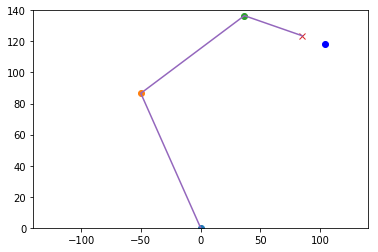

In [31]:
# Para graficar tomamos las coordenadas de los puntos de interés, respecto de la base
x_J1 = Tb1[0,2]
y_J1 = Tb1[1,2]
x_J2 = Tb2[0,2]
y_J2 = Tb2[1,2]
x_ee = Tbee[0,2]
y_ee = Tbee[1,2]
x_objeto = pObjeto_b[0]
y_objeto = pObjeto_b[1]

# ya podemos graficar
fig, axes = plt.subplots()
# primero los puntosj
plt.plot(0,0, 'o')
plt.plot(x_J1,y_J1, 'o')
plt.plot(x_J2,y_J2, 'o')
plt.plot(x_ee,y_ee, 'x')
plt.plot(x_objeto, y_objeto, 'bo')
# grafiquemos luego las lineas
plt.plot([0,x_J1,x_J2,x_ee],[0,y_J1,y_J2,y_ee])
# ajustamos los ejes
axes.set_xlim(-140,140)
axes.set_ylim(0,140)
plt.show()

### Problema:
Si el objeto O mantiene su posición respecto de la base del robot pero ahora el brazo se ubica en la posición de la figura 2 ¿Qué distancia hay entre el actuador final y el objeto?<br>
<img src="actividad2_fig2.png" width="400"><br>
<br>
<i>Indicación:</i> En una celda escriba el código requerido para graficar las posiciones del robot y el objeto y en una segunda celda escriba las líneas de código necesarias para calcular la distancia entre el actuador final y el objeto.<br>
<i>Pista:</i> Para calcular distancia entre dos puntos, ambos puntos deben estar representados en el mismo sistema de coordenadas. Seleccione el sistema de coordenadas que le resulte más adecuado. (El resultado es d = 38.39)<br>